# Análise da vacinação no estado do Acre

### Candidata Thaíza Loiola
### Economic research - intern

In [15]:
import pandas as pd

## Extraindo os dados da base:

In [14]:
#Selecionando apenas as colunas que vão interessar para esta análise

require_cols = ['paciente_endereco_uf', 'vacina_dataAplicacao','vacina_nome', 'vacina_dose']

In [16]:
#extraindo os dados do excel:

required_df = pd.read_excel(r'C:\Users\thaiz\OneDrive\Documentos\semestre\processo\dadosacre.xlsx',sheet_name='dadosacre', usecols = require_cols)
  
print(required_df)

      paciente_endereco_uf      vacina_dataAplicacao vacina_dose  \
0                       AC  2021-02-26T03:00:00.000Z           2   
1                       AC  2021-03-24T03:00:00.000Z           1   
2                       AC  2021-02-04T03:00:00.000Z           1   
3                       AC  2021-03-24T03:00:00.000Z           1   
4                       AC  2021-02-01T03:00:00.000Z           1   
...                    ...                       ...         ...   
64999                   AC  2021-03-24T03:00:00.000Z           1   
65000                   AC  2021-03-19T03:00:00.000Z           1   
65001                   AC  2021-03-24T03:00:00.000Z           1   
65002                   AC  2021-03-22T03:00:00.000Z           1   
65003                   AC  2021-03-22T03:00:00.000Z           1   

                               vacina_nome  
0      Covid-19-Coronavac-Sinovac/Butantan  
1             Vacina Covid-19 - Covishield  
2             Vacina Covid-19 - Covishield  
3  

## Trabalhando os dados:

In [17]:
#convertendo as datas em formato de datatime: 

import datetime
def convertDate(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
     return new_date.date()


In [18]:
required_df['vacina_dataAplicacao'] = required_df['vacina_dataAplicacao'].apply(convertDate)

#print (required_df['vacina_dataAplicacao'])

In [19]:
#ORDENANDO as datas (e os dados correspondente às datas) em ordem crescente:

required_df.sort_values(by=['vacina_dataAplicacao'], inplace=True)

#required_df

In [20]:
#Retirar dados de outras UFs e deixar só os do AC (filtrar os dados do acre):

required_df_ac = required_df[required_df['paciente_endereco_uf'] == 'AC']

#required_df_ac

In [13]:
#verificando se o filtro funcionou mesmo:

#c =required_df_ac['paciente_endereco_uf'] == 'AC'
#len(c)

## Análise da quantidade de vacinas totais por dia:

In [22]:
#Agrupando quantas pessoas foram vacinadas por dia no total:

n_by_date = required_df_ac.groupby("vacina_dataAplicacao")["paciente_endereco_uf"].count()

#print(n_by_date.iloc[:10])

In [23]:
#construção do gráfico de quantas pessoas foram vacinadas por dia:

from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

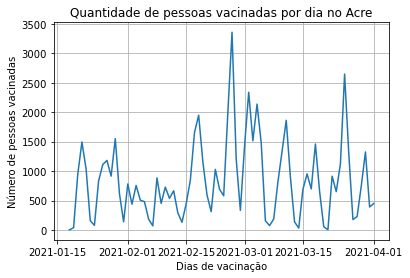

In [25]:
plt.plot(n_by_date)
plt.title('Quantidade de pessoas vacinadas por dia no Acre')
plt.grid()
plt.xlabel('Dias de vacinação')
plt.ylabel('Número de pessoas vacinadas')
plt.savefig('pessoasvacinadastotal.png')
plt.show


## Análise da quantidade acumulada de vacinas totais por dia :

In [78]:
#Data frame do acumulado de vacinação durante o período:

acum_by_date = pd.DataFrame (n_by_date)
df4 = acum_by_date.paciente_endereco_uf
acum_by_date['acumulado'] = df4.cumsum()
#acum_by_date



<function matplotlib.pyplot.show(close=None, block=None)>

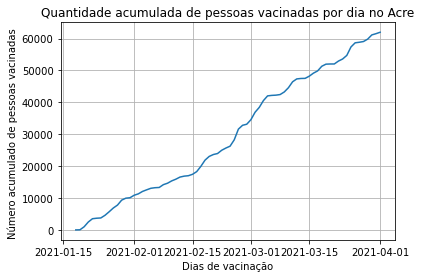

In [79]:
#Quantidade acumulada de vacinações:

plt.plot(acum_by_date['acumulado'])
plt.title('Quantidade acumulada de pessoas vacinadas por dia no Acre')
plt.grid()
plt.xlabel('Dias de vacinação')
plt.ylabel('Número acumulado de pessoas vacinadas ')
plt.savefig('pessoasvacinadastotalacum.png')
plt.show

## Análise da vacinação separada por tipo de vacina:

In [80]:
#Quantidade de vacinados por tipo de vacina:

n_by_vacina =required_df_ac.groupby(["paciente_endereco_uf", "vacina_nome"])["vacina_dataAplicacao"].count()

n_by_vacina

paciente_endereco_uf  vacina_nome                                  
AC                    Covid-19-Coronavac-Sinovac/Butantan              40106
                      Vacina Covid-19 - Covishield                     21856
                      Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag       25
Name: vacina_dataAplicacao, dtype: int64

### Sinovac:

In [81]:
n_by_vacina_sinovac = required_df_ac[required_df_ac["vacina_nome"] =='Covid-19-Coronavac-Sinovac/Butantan']


In [82]:
#Vacinas sinovac e o respectivo dia de sua aplicação:

n_by_day_vacina_sinovac = n_by_vacina_sinovac.groupby("vacina_dataAplicacao")["paciente_endereco_uf"].count()




In [83]:
a = len(n_by_day_vacina_sinovac)

In [84]:
#Data frame do acumulado de vacinação por sinovac durante o período:

acum_by_day_vacina_sinovac = pd.DataFrame (n_by_day_vacina_sinovac)

df1 = acum_by_day_vacina_sinovac.paciente_endereco_uf

acum_by_day_vacina_sinovac['acumulado'] = df1.cumsum()
#acum_by_day_vacina_sinovac


### Janssen:

In [85]:
n_by_vacina_janssen = required_df_ac[required_df_ac["vacina_nome"] =='Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag']



In [86]:
#Vacinas janssen e o respectivo dia de sua aplicação:

n_by_day_vacina_janssen = n_by_vacina_janssen.groupby("vacina_dataAplicacao")["paciente_endereco_uf"].count()


In [87]:

b = len(n_by_day_vacina_janssen)

In [88]:
#Data frame do acumulado de vacinação por janssen durante o período:

acum_by_day_vacina_janssen = pd.DataFrame (n_by_day_vacina_janssen)

df3 = acum_by_day_vacina_janssen.paciente_endereco_uf

acum_by_day_vacina_janssen['acumulado'] = df3.cumsum()

#acum_by_day_vacina_janssen

### Covishield:

In [89]:
n_by_vacina_covishield = required_df_ac[required_df_ac["vacina_nome"] =='Vacina Covid-19 - Covishield']



In [90]:
#Vacinas Covishield e o respectivo dia de sua aplicação:
n_by_day_vacina_covishield = n_by_vacina_covishield.groupby("vacina_dataAplicacao")["paciente_endereco_uf"].count()



In [91]:
c =len(n_by_day_vacina_covishield)

In [92]:
#Data frame do acumulado de vacinação por Covishield durante o período:

acum_by_day_vacina_covishield = pd.DataFrame (n_by_day_vacina_covishield)

df2 = acum_by_day_vacina_covishield.paciente_endereco_uf

acum_by_day_vacina_covishield['acumulado'] = df2.cumsum()
#acum_by_day_vacina_covishield




 ### Visualização da proporção de cada vacina e suas aplicações no estado:

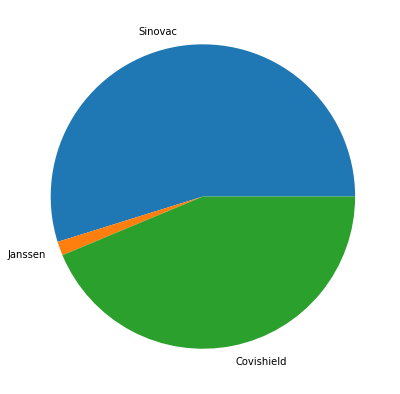

In [93]:
#gráfico de pizza para visualizar vacinas mais e menos aplicadas dentro do estado do Acre

vacinas = ['Sinovac', 'Janssen', 'Covishield']
  
data = [a, b, c]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = vacinas)

plt.savefig('graficopizza.png')

# show plot
plt.show()



## Análise da quantidade de vacinas por dia (discriminando por vacina):

####Obs: as análises à seguir ignorarão a janssen pois ela foi responsável por um número irrisório dentre todas as vacinas aplicadas.

<function matplotlib.pyplot.show(close=None, block=None)>

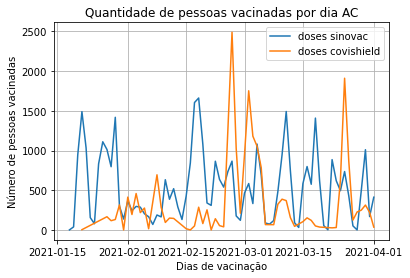

In [94]:
#Quantidade de vacinações discriminada por vacinas:

plt.plot(n_by_day_vacina_sinovac, label = "doses sinovac")
plt.plot(n_by_day_vacina_covishield, label = "doses covishield")
plt.title('Quantidade de pessoas vacinadas por dia AC')
plt.grid()
plt.xlabel('Dias de vacinação')
plt.ylabel('Número de pessoas vacinadas')
plt.legend()
plt.savefig('pessoasvacinadasseparado.png')
plt.show

## Análise da quantidade acumulada de vacinas por dia (discriminando por vacina):

<function matplotlib.pyplot.show(close=None, block=None)>

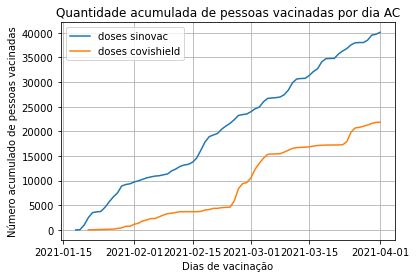

In [95]:
#quantidades acumuladas das duas vacinas:

plt.plot(acum_by_day_vacina_sinovac['acumulado'], label = "doses sinovac")
plt.plot(acum_by_day_vacina_covishield['acumulado'], label = "doses covishield")
plt.title('Quantidade acumulada de pessoas vacinadas por dia AC')
plt.grid()
plt.xlabel('Dias de vacinação')
plt.ylabel('Número acumulado de pessoas vacinadas')
plt.legend()
plt.savefig('pessoasvacinadasseparadoacum.png')
plt.show

## Análise das doses das vacinas por dia:

In [96]:
#Quantidades aplicadas da dose 1 e 2:

n_by_dose =required_df_ac.groupby(["paciente_endereco_uf", "vacina_dose"])["vacina_dataAplicacao"].count()

n_by_dose

paciente_endereco_uf  vacina_dose
AC                    1              49765
                      2              12197
                      D                 25
Name: vacina_dataAplicacao, dtype: int64

### Análise da distribuição da primeira dose das vacinas:

In [97]:
n_by_dose1= required_df_ac[required_df_ac["vacina_dose"] =='1']


In [98]:
#Primeiras doses das vacinas e seus respectivos dias de suas aplicações:

n_by_day_dose1 = n_by_dose1.groupby("vacina_dataAplicacao")["paciente_endereco_uf"].count()


In [99]:
#Data frame do acumulado de vacinação da primeira dose durante o período:

acum_by_dose1 = pd.DataFrame (n_by_dose1)

acum_by_dose1['vacina_dose'] =pd.to_numeric(acum_by_dose1['vacina_dose'])

df5 = acum_by_dose1.vacina_dose

acum_by_dose1['acumulado'] = df5.cumsum()
#acum_by_dose1


### Análise da distribuição da segunda dose das vacinas:

In [100]:
n_by_dose2 = required_df_ac[required_df_ac["vacina_dose"] =='2']



In [101]:
#Segundas doses das vacinas e seus respectivos dias de suas aplicações:

n_by_day_dose2 = n_by_dose2.groupby("vacina_dataAplicacao")["paciente_endereco_uf"].count()

#n_by_day_dose2

In [102]:
#Data frame do acumulado de vacinação da segunda dose durante o período:

acum_by_dose2 = pd.DataFrame (n_by_dose2)

acum_by_dose2['vacina_dose'] =pd.to_numeric(acum_by_dose2['vacina_dose'])

df6 = acum_by_dose2.vacina_dose

acum_by_dose2['acumulado'] = df6.cumsum()
#acum_by_dose2

## Análise da quantidade de doses de vacinas aplicadas por dia (discriminando por dose):

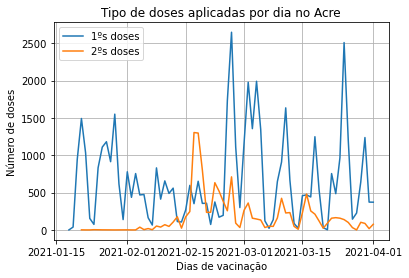

In [103]:
#Gráfico para primeiras e segundas doses ministradas por dia:

plt.plot(n_by_day_dose1, label = "1ºs doses")
plt.plot(n_by_day_dose2, label = "2ºs doses")
plt.title('Tipo de doses aplicadas por dia no Acre')
plt.grid()
plt.xlabel('Dias de vacinação')
plt.ylabel('Número de doses')
plt.legend()
plt.savefig('dosesseparado.png')
plt.show()

## Análise da quantidade acumulada de doses de vacinas aplicadas por dia (discriminando por dose):

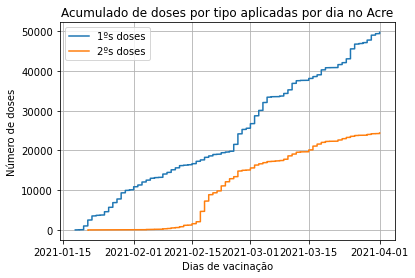

In [104]:
plt.plot(acum_by_dose1['vacina_dataAplicacao'],acum_by_dose1['acumulado'], label = "1ºs doses")
plt.plot(acum_by_dose2['vacina_dataAplicacao'],acum_by_dose2['acumulado'], label = "2ºs doses")
plt.title('Acumulado de doses por tipo aplicadas por dia no Acre')
plt.grid()
plt.xlabel('Dias de vacinação')
plt.ylabel('Número de doses')
plt.legend()
plt.savefig('dosesseparadoacum.png')
plt.show()

## Importando os dados e seus respectivos gráficos para o Excel:

In [105]:
#Transformando em dataframe quem ainda não era dataframe:

#Gráfico_1
#pessoasvacinadastotal.png
n_by_date = pd.DataFrame(n_by_date)

#Gráfico_2
#pessoasvacinadastotal.png
#acum_by_date

#Gráfico_3
#graficopizza.png
n_by_vacina =  pd.DataFrame(n_by_vacina)

#Gráfico_4
#pessoasvacinadasseparado.png
n_by_day_vacina_sinovac = pd.DataFrame(n_by_vacina_sinovac)
n_by_day_vacina_covishield = pd.DataFrame(n_by_vacina_covishield)

#Gráfico_5
#pessoasvacinadasseparadoacum.png
#acum_by_day_vacina_sinovac
#acum_by_day_vacina_covishield

#Gráfico_6
#dosesseparado.png
n_by_day_dose1 = pd.DataFrame(n_by_day_dose1)
n_by_day_dose2= pd.DataFrame(n_by_day_dose2)

#Gráfico_7
#dosesseparadoacum.png
#acum_by_dose1
#acum_by_dose2

In [106]:
#Criando um arquivo do excel que trás em cada aba o gráfico e seu respetivo dataframe associado a ele:

excel_file = 'test.xlsx'
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
workbook = writer.book  
dataframes = (n_by_date, acum_by_date, n_by_vacina,n_by_day_vacina_sinovac, n_by_day_vacina_covishield, acum_by_day_vacina_sinovac, acum_by_day_vacina_covishield,n_by_day_dose1,n_by_day_dose2,acum_by_dose1,acum_by_dose2)  
chart = ('pessoasvacinadastotal.png','pessoasvacinadastotal.png','graficopizza.png','pessoasvacinadasseparado.png','pessoasvacinadasseparado.png','pessoasvacinadasseparadoacum.png','pessoasvacinadasseparadoacum.png','dosesseparado.png','dosesseparado.png','dosesseparadoacum.png','dosesseparadoacum.png')

# Loop through our list of dataframes
for i in range(len(dataframes)):
    sheet_name = 'graph_' + '123445566778'[i]    # testa, testb, etc.
    dataframe = dataframes[i]

    dataframe.to_excel(writer, sheet_name=sheet_name, index=False)
    worksheet = writer.sheets[sheet_name]
   
    worksheet.insert_image('C2', chart[i])

# Now that we have finished our loop
writer.save()